## Heart Attack Risk Assessment
**Source**: https://www.kaggle.com/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset/data

In [1]:
import kagglehub

dataset_path = "shriyashjagtap/heart-attack-risk-assessment-dataset"
path = kagglehub.dataset_download(dataset_path)

print("Path to the dataset:", path)

/opt/anaconda3/envs/hara/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to the dataset: /Users/duongtuanhoang/.cache/kagglehub/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset/versions/3


In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
datafiles = [os.path.join(path,file) for file in os.listdir(path) if os.path.isfile(os.path.join(path,file))]
print(f"Files in the dataset:\n {datafiles}")

# Load the dataset into a pandas DataFrame
df = pd.concat([pd.read_csv(file) for file in datafiles], ignore_index=True)
df.head()


Files in the dataset:
 ['/Users/duongtuanhoang/.cache/kagglehub/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset/versions/3/updated_version.csv']


,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


In [4]:
df.info()
print(f"\n{df['heart_attack'].value_counts()}\n")
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB

heart_attack
0    896
1    104
Name: count, dtype: int64



,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,0.52700,201.087486,130.047807,49.811244,120.312687,80.231248,0.202000,0.090000,0.104000
std,14.209466,0.49952,40.042655,30.041659,10.247178,15.507493,10.235917,0.401693,0.286325,0.305413
min,18.000000,0.00000,84.165932,36.259745,20.600644,74.433950,49.296305,0.000000,0.000000,0.000000
25%,40.000000,0.00000,174.707208,111.963197,42.622102,110.062952,73.277119,0.000000,0.000000,0.000000
50%,49.000000,1.00000,201.191547,130.678540,49.682809,120.042175,79.912592,0.000000,0.000000,0.000000
75%,59.000000,1.00000,226.251708,149.732446,56.703598,130.911804,87.084443,0.000000,0.000000,0.000000
max,94.000000,1.00000,354.660015,231.376631,82.319810,164.080967,113.848127,1.000000,1.000000,1.000000


In [5]:
print(df.isnull().sum())


age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64


The dataset is pretty good. No missing value. Everything is numerical

In [6]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   float64
 1   sex                1000 non-null   float64
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   float64
 8   diabetes           1000 non-null   float64
 9   heart_attack       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB
      age  sex  total_cholesterol         ldl        hdl  systolic_bp  \
0    57.0  1.0         229.463642  175.879129  39.225687   124.070127   
1    58.0  1.0         186.464120  128.984916  34.950968    95.492552   
2    37.0  1.0         251.300719  152.347592  45.913288 

heart_attack
0.0    0.896
1.0    0.104
Name: proportion, dtype: float64


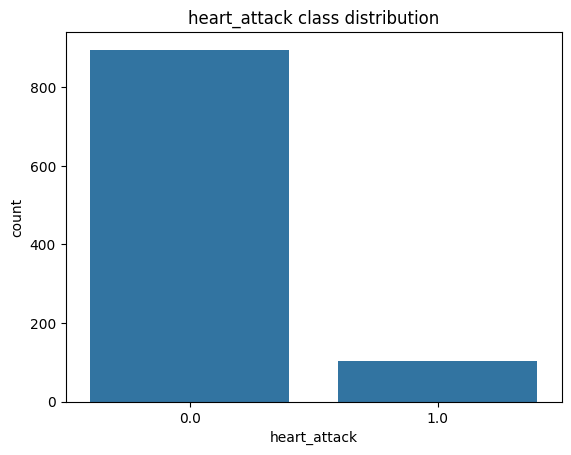

In [7]:
print(df['heart_attack'].value_counts(normalize=True))  # See % distribution
sns.countplot(x='heart_attack', data=df)
plt.title("heart_attack class distribution")
plt.show()

We can see that the heart_attack is heavily skewed to person with no heart_attack behavior. We might need to oversample to make sure that this majority wouldn't affect the decision of the model

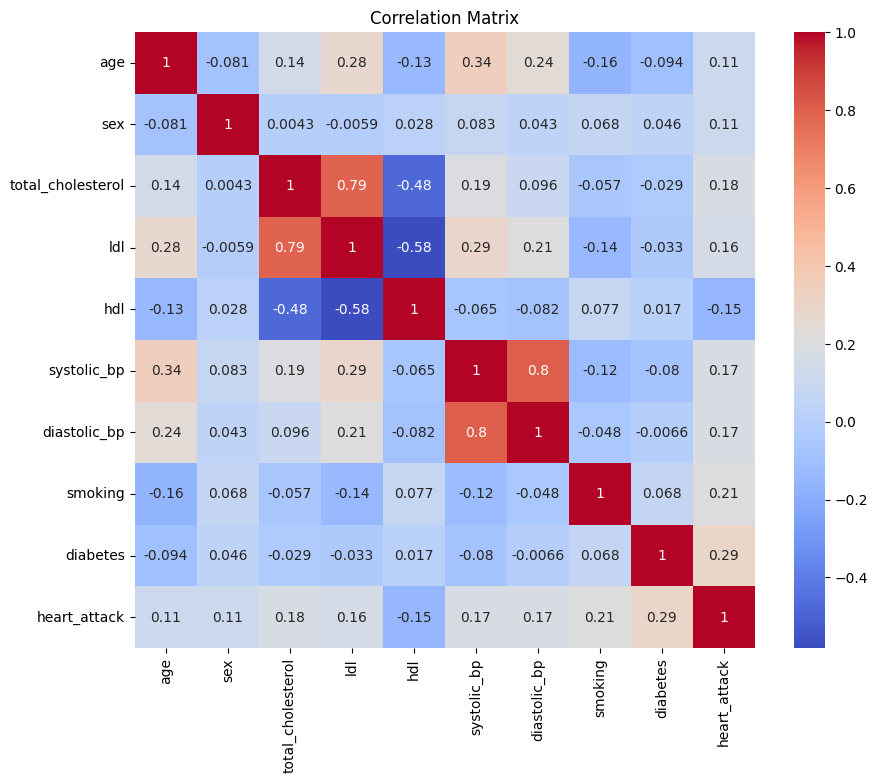

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

There is not a really strong relationship between these features columns against target column. However, we can see that some features columns are correlated with each other such as *systoloc_bp* and *diastolic_bp* or *total_cholesterol* and *ldl* and *hdl*. There could be a possibility for multi-correlation

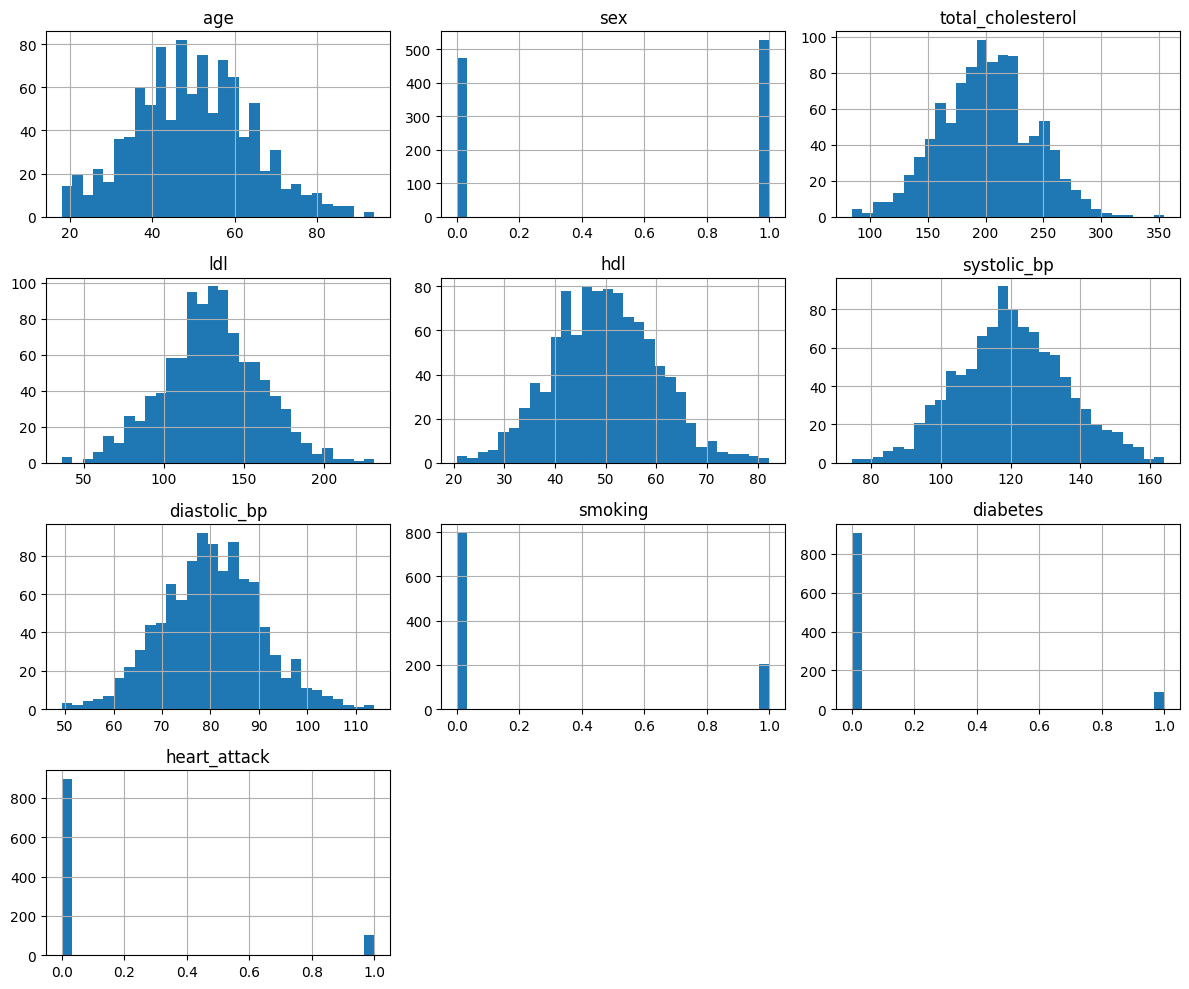

In [9]:
# Distribution of numeric features
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

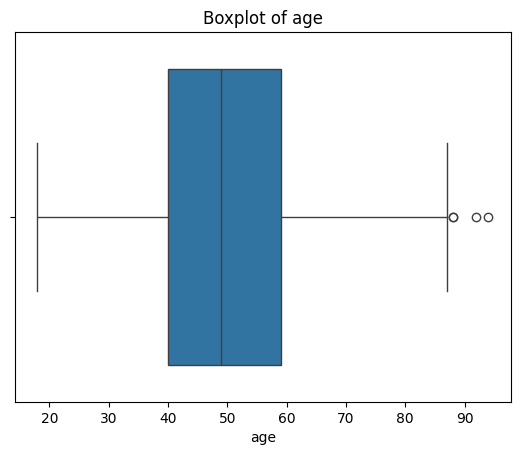

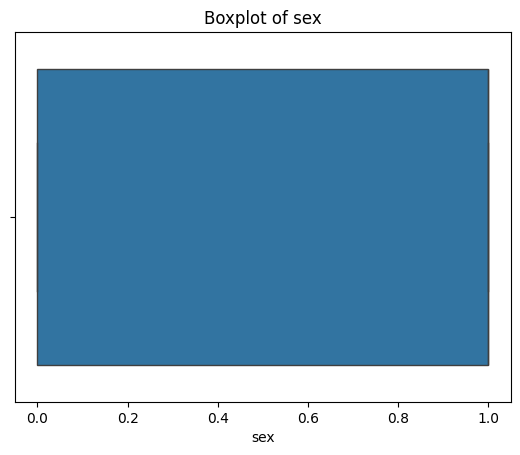

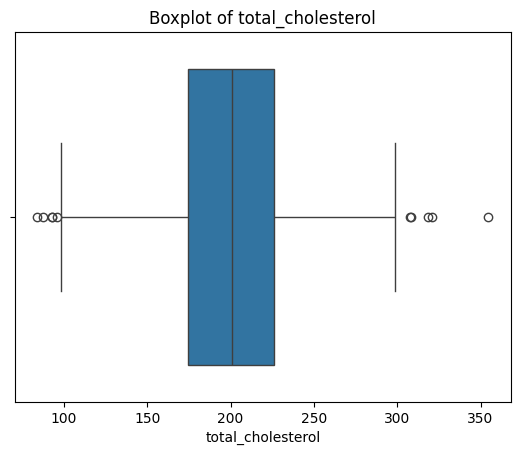

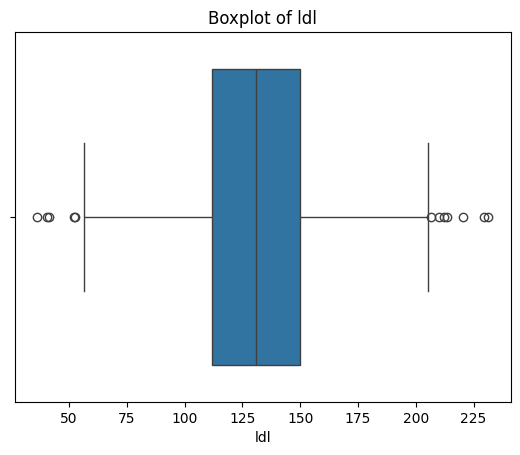

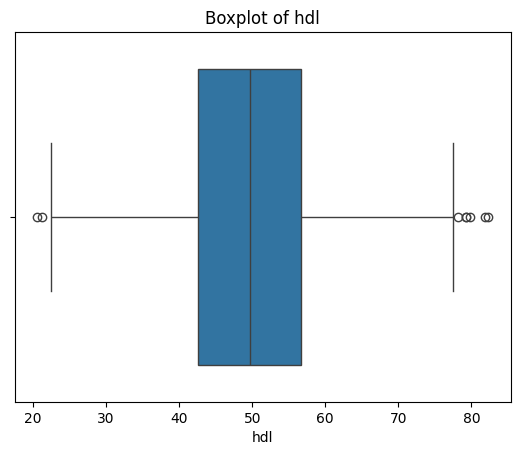

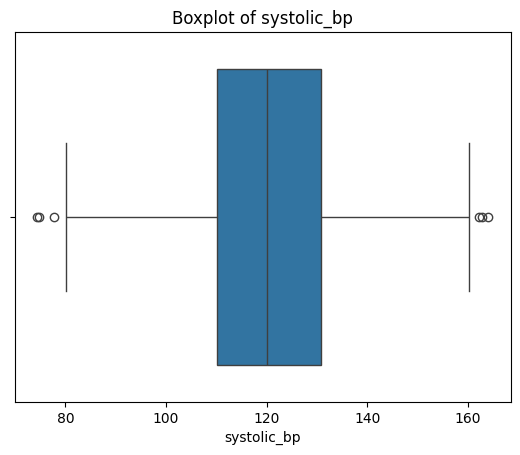

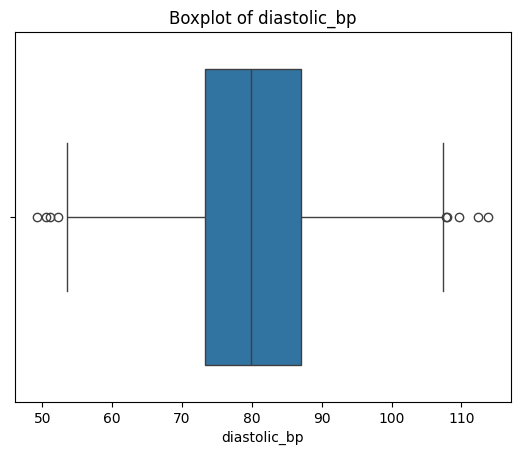

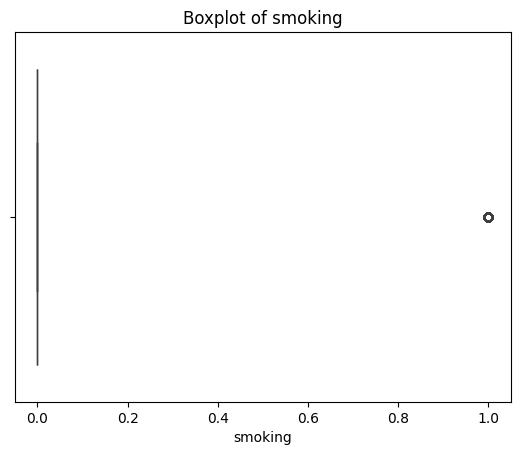

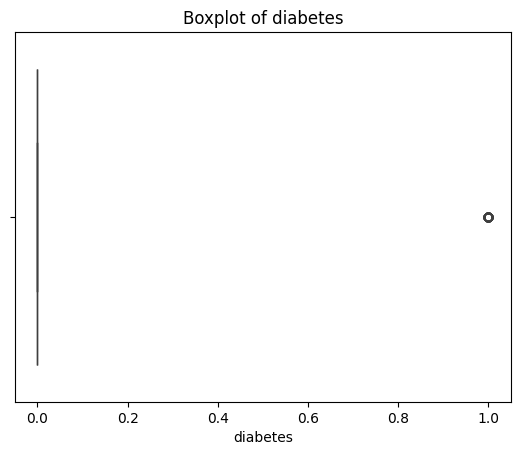

In [10]:
# Boxplots for outlier detection
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("heart_attack")
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Preprocessing

In [11]:
X = df.drop("heart_attack", axis=1)
y = df["heart_attack"]

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.22201861,  0.92528293,  1.23053043, ..., -0.55438599,
        -0.48825208, -0.32634444],
       [-1.2162643 ,  0.92528293,  0.2598067 , ..., -1.09666032,
        -0.48825208, -0.32634444],
       [-0.29303616,  0.92528293,  0.05750022, ...,  0.96839313,
         2.04812236, -0.32634444],
       ...,
       [-1.3582994 , -1.08075052, -0.30885485, ..., -0.24615914,
        -0.48825208,  3.06424712],
       [ 1.12731482, -1.08075052, -0.86576499, ..., -0.3798074 ,
        -0.48825208, -0.32634444],
       [ 1.05629727, -1.08075052, -0.66249079, ...,  0.52727124,
        -0.48825208, -0.32634444]])

In [14]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
y_train_balanced.value_counts()

/opt/anaconda3/envs/hara/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


heart_attack
0.0    717
1.0    717
Name: count, dtype: int64

In [15]:
# --- 📈 Model Training and Comparison --- #
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True)
}


📊 Logistic Regression Evaluation
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       179
         1.0       0.33      0.67      0.44        21

    accuracy                           0.82       200
   macro avg       0.64      0.75      0.67       200
weighted avg       0.89      0.82      0.85       200

ROC AUC Score: 0.8502261239691407


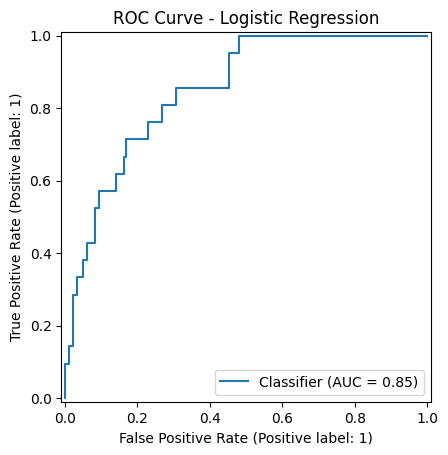


📊 Random Forest Evaluation
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       179
         1.0       0.47      0.33      0.39        21

    accuracy                           0.89       200
   macro avg       0.70      0.64      0.66       200
weighted avg       0.88      0.89      0.88       200

ROC AUC Score: 0.8197658951848896


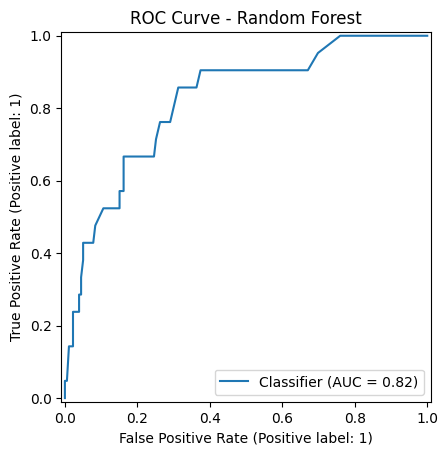


📊 Gradient Boosting Evaluation
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       179
         1.0       0.34      0.48      0.40        21

    accuracy                           0.85       200
   macro avg       0.64      0.69      0.66       200
weighted avg       0.87      0.85      0.86       200

ROC AUC Score: 0.8209630220803406


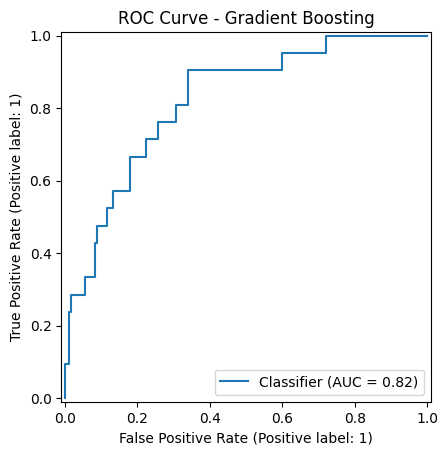


📊 Support Vector Machine Evaluation
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       179
         1.0       0.32      0.48      0.38        21

    accuracy                           0.84       200
   macro avg       0.63      0.68      0.65       200
weighted avg       0.87      0.84      0.85       200

ROC AUC Score: 0.7983506251662676


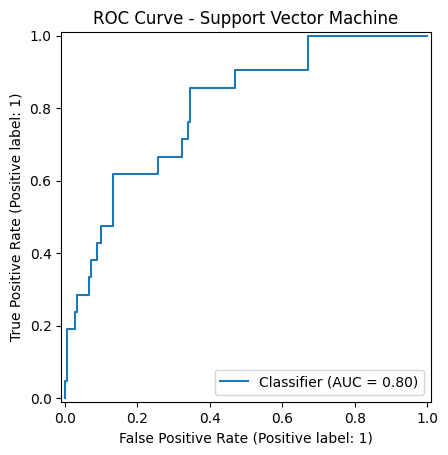

In [16]:
results = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n📊 {name} Evaluation")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    results[name] = roc_auc_score(y_test, y_prob)

In [17]:
# --- 🏆 Select Best Model --- #
best_model_name = max(results, key=results.get)
print("\n✅ Best Model:", best_model_name, "with ROC AUC:", results[best_model_name])
best_model = models[best_model_name]


✅ Best Model: Logistic Regression with ROC AUC: 0.8502261239691407


In [18]:
import joblib
joblib.dump(best_model, "best_heart_attack_model.pkl")

['best_heart_attack_model.pkl']